# MIMIC-IV 2.0 analysis using PyDTS (Meir and Gorfine, 2025)

The utility of *PyDTS* is demonstrated through an analysis of patients' length of stay (LOS) in intensive care unit (ICU) [1]. This analysis uses the publicly accessible, large-scale Medical Information Mart for Intensive Care (MIMIC-IV, version 2.0) dataset. 

Meir and Gorfine (2025) [1] developed a discrete-time survival model to predict ICU LOS based on patients’ clinical characteristics at admission.
The dataset comprises 25,170 ICU patients. For each patient, only the last admission is considered, and features related to prior admission history are included. The LOS is recorded in discrete units from 1 to 28 days, resulting in many patients sharing the same event time on each day. 

Three competing events are considered: 

1. Discharge to home (69.0%),

2. Transfer to another medical facility (21.4%)

3. In-hospital death (6.1%).

Patients who left the ICU against medical advice (1.0%) are treated as right-censored, and administrative censoring is applied to those hospitalized for more than 28 days (2.5%). 

The analysis includes 36 covariates per patient, comprising patient characteristics and laboratory test results at admission.  Full description of the data is presented below.

The preprocessing procedure of [1,2] is implemented in `pydts.example_utils.get_mimic_df()`. 

Note that the MIMIC-IV dataset itself is not included in *PyDTS*; it is available at https://physionet.org/content/mimiciv/2.0/ and requires credentialed access.

## Preprocessed MIMIC-IV v2.0 Dataset

In [1]:
from pydts.examples_utils.datasets import get_mimic_df
from pydts.examples_utils.mimic_consts import *

MIMIC_IV_v2_FILES_LOCATION = "/data/mimic-iv-2.0"

mimic_df, characteristics_table1, labs_table1 = get_mimic_df(MIMIC_IV_v2_FILES_LOCATION, return_table1=True)

In [2]:
characteristics_table1

Grouped by Discharge location  \
                                                                             Overall   
n                                                                              25170   
Sex, n (%)                           Female                             12291 (48.8)   
                                     Male                               12879 (51.2)   
Admission age, mean (SD)                                                 64.1 (17.9)   
Race, n (%)                          Asian                                1035 (4.1)   
                                     Black                               3543 (14.1)   
                                     Hispanic                             1326 (5.3)   
                                     Other                                1671 (6.6)   
                                     White                              17595 (69.9)   
Insurance, n (%)                     Medicaid                             1423 (5.7)   
                                     Medicare                           10609 (42.1)   
                                     Other                              13138 (52.2)   
Marital status, n (%)                Divorced                             2043 (8.1)   
                                     Married                            11289 (44.9)   
                                     Single                              8414 (33.4)   
                                     Widowed                             3424 (13.6)   
Direct emergency, n (%)              No                                 22398 (89.0)   
                                     Yes                                 2772 (11.0)   
Night admission, n (%)               No                                 11604 (46.1)   
                                     Yes                                13566 (53.9)   
Previous admission this month, n (%) No                                 23138 (91.9)   
                                     Yes                                  2032 (8.1)   
Admissions number, n (%)             1                                  15471 (61.5)   
                                     2                                   4121 (16.4)   
                                     3+                                  5578 (22.2)   
LOS (days), mean (SD)                                                      7.0 (6.1)   
Discharge location, n (%)            Censored                              894 (3.6)   
                                     Died                                 1540 (6.1)   
                                     Further Treatment                   5379 (21.4)   
                                     Home                               17357 (69.0)   

                                                                     \
                                                           Censored   
n                                                               894   
Sex, n (%)                           Female              373 (41.7)   
                                     Male                521 (58.3)   
Admission age, mean (SD)                                58.4 (16.5)   
Race, n (%)                          Asian                 27 (3.0)   
                                     Black               154 (17.2)   
                                     Hispanic              53 (5.9)   
                                     Other                 65 (7.3)   
                                     White               595 (66.6)   
Insurance, n (%)                     Medicaid              86 (9.6)   
                                     Medicare            316 (35.3)   
                                     Other               492 (55.0)   
Marital status, n (%)                Divorced             94 (10.5)   
                                     Married             329 (36.8)   
                                     Single              403 (45.1)   
                               

In [3]:
labs_table1

Grouped by Discharge location  \
                                                                  Overall   
n                                                                   25170   
Discharge location, n (%) Censored                              894 (3.6)   
                          Died                                 1540 (6.1)   
                          Further Treatment                   5379 (21.4)   
                          Home                               17357 (69.0)   
Anion gap, n (%)          Abnormal                             2305 (9.2)   
                          Normal                             22865 (90.8)   
Bicarbonate, n (%)        Abnormal                            6135 (24.4)   
                          Normal                             19035 (75.6)   
Calcium total, n (%)      Abnormal                            7326 (29.1)   
                          Normal                             17844 (70.9)   
Chloride, n (%)           Abnormal                            4848 (19.3)   
                          Normal                             20322 (80.7)   
Creatinine, n (%)         Abnormal                            7124 (28.3)   
                          Normal                             18046 (71.7)   
Glucose, n (%)            Abnormal                           16426 (65.3)   
                          Normal                              8744 (34.7)   
Magnesium, n (%)          Abnormal                             2220 (8.8)   
                          Normal                             22950 (91.2)   
Phosphate, n (%)          Abnormal                            6962 (27.7)   
                          Normal                             18208 (72.3)   
Potassium, n (%)          Abnormal                             2109 (8.4)   
                          Normal                             23061 (91.6)   
Sodium, n (%)             Abnormal                            2947 (11.7)   
                          Normal                             22223 (88.3)   
Urea nitrogen, n (%)      Abnormal                           10032 (39.9)   
                          Normal                             15138 (60.1)   
Hematocrit, n (%)         Abnormal                           17319 (68.8)   
                          Normal                              7851 (31.2)   
Hemoglobin, n (%)         Abnormal                           18355 (72.9)   
                          Normal                              6815 (27.1)   
MCH, n (%)                Abnormal                            6559 (26.1)   
                          Normal                             18611 (73.9)   
MCHC, n (%)               Abnormal                            7762 (30.8)   
                          Normal                             17408 (69.2)   
MCV, n (%)                Abnormal                            5106 (20.3)   
                          Normal                             20064 (79.7)   
Platelet count, n (%)     Abnormal                            7280 (28.9)   
                          Normal                             17890 (71.1)   
RDW, n (%)                Abnormal                            7280 (28.9)   
                          Normal                             17890 (71.1)   
Red blood cells, n (%)    Abnormal                           19170 (76.2)   
                          Normal                              6000 (23.8)   
White blood cells, n (%)  Abnormal                           10013 (39.8)   
                          Normal                             15157 (60.2)   

                                                                        \
                                                Censored          Died   
n                                                    894          1540   
Discharge location, n (%) Censored           894 (100.0)       0 (0.0)   
                          Died                   0 (0.0)  1540 (100.0)   
                          Further Treatment      0 (0.

Three estimation procedures were compared: 

1. The method of Lee et al. (2018) [3] without regularization
2. The two-step approach of Meir and Gorfine (2025) [2] without regularization.
3. The two-step approach of Meir and Gorfine (2025) [2] with LASSO regularization.

When applying the two-step procedure with LASSO regularization, we need to specify the hyperparameters that control the amount of regularization applied to each competing event. As demonstrated in the regularization section of this documentation, *PyDTS* provides functionality for tuning these hyperparameters via K-fold cross-validation. By default, the optimal values are those that maximize the out-of-sample global-AUC metric, as defined in Meir and Gorfine (2025), Appendix I. Additional tuning options are also available.
Here, a grid search with 4-fold cross-validation was performed to select the optimal hyperparameters that maximize the global-AUC.
The code below illustrates such tuning procedure.

In [4]:
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from pydts.cross_validation import PenaltyGridSearchCV
import pandas as pd

step = 1
penalizers = np.arange(-12, -0.9, step=step)
n_splits = 4
seed = 1

penalty_cv_search = PenaltyGridSearchCV()
gauc_cv_results = penalty_cv_search.cross_validate(full_df=mimic_df, l1_ratio=1, penalizers=np.exp(penalizers),
                                                   n_splits=n_splits, seed=seed)
print(gauc_cv_results['Mean'].max())
print(gauc_cv_results['Mean'].idxmax())
chosen_eta = np.log(gauc_cv_results['Mean'].idxmax())
print(chosen_eta)

0.6509085412936966
(np.float64(0.006737946999085467), np.float64(0.00012340980408667956), np.float64(1.670170079024566e-05))
[ -5.  -9. -11.]


The procedure returns a `pd.DataFrame` with the penalizers combination as the index and the mean and standard deviation of the global-AUC across folds as the values.

In [5]:
gauc_cv_results

Mean        SE
0.000006 0.000006 0.000006  0.649354  0.003654
                  0.000017  0.649362  0.003654
                  0.000045  0.649366  0.003650
                  0.000123  0.649284  0.003640
                  0.000335  0.649084  0.003556
...                              ...       ...
0.367879 0.367879 0.006738  0.632751  0.001759
                  0.018316  0.632656  0.001746
                  0.049787  0.632863  0.001756
                  0.135335  0.633117  0.001749
                  0.367879  0.633375  0.001758

[1728 rows x 2 columns]

The chosen penalizaers $\eta_j$, $j=1,2,3$, are the ones that maximize the global-AUC, thus,

In [6]:
print(f"Maximum global-AUC (mean across folds): {gauc_cv_results['Mean'].max()}")
chosen_eta = np.log(gauc_cv_results['Mean'].idxmax())
print(f"Chosen penalizers: exp(", chosen_eta, ")")

Maximum global-AUC (mean across folds): 0.6509085412936966
Chosen penalizers: exp( [ -5.  -9. -11.] )


Additional metrics are also available - for example, the integrated AUC in each fold for each risk is included in `penalty_cv_search.integrated_auc`

## Model Estimation

We now train and compare the three estimation methods, using the selected penalizers for the regularized two-step procedure:

### Estimation using Lee et al. (2018)

In [7]:
from pydts.fitters import DataExpansionFitter

lee_fitter = DataExpansionFitter()
lee_fitter.fit(df=mimic_df)

### Estimation using two-step without regularization

In [8]:
from pydts.fitters import TwoStagesFitter

new_fitter = TwoStagesFitter()
new_fitter.fit(df=mimic_df)

### Estimation using two-step with regularization

In [9]:
reg_fitter = TwoStagesFitter()
fit_beta_kwargs = {
        'model_kwargs': { 
            1: {'penalizer': np.exp(chosen_eta[0]), 'l1_ratio': 1},
            2: {'penalizer': np.exp(chosen_eta[1]), 'l1_ratio': 1},
            3: {'penalizer': np.exp(chosen_eta[2]), 'l1_ratio': 1},            
    }
}

reg_fitter.fit(df=mimic_df, fit_beta_kwargs=fit_beta_kwargs)

Risk 1: 16.25 non-zero coefficients at chosen eta -5.0
Risk 2: 32.75 non-zero coefficients at chosen eta -9.0
Risk 3: 35.25 non-zero coefficients at chosen eta -11.0


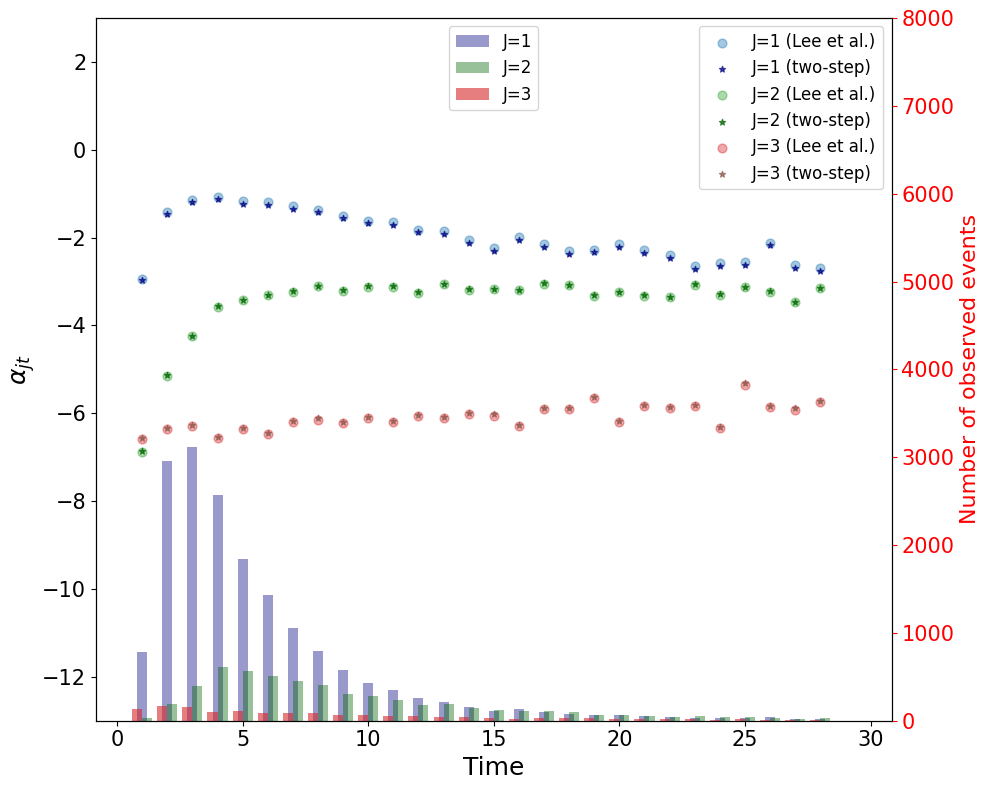

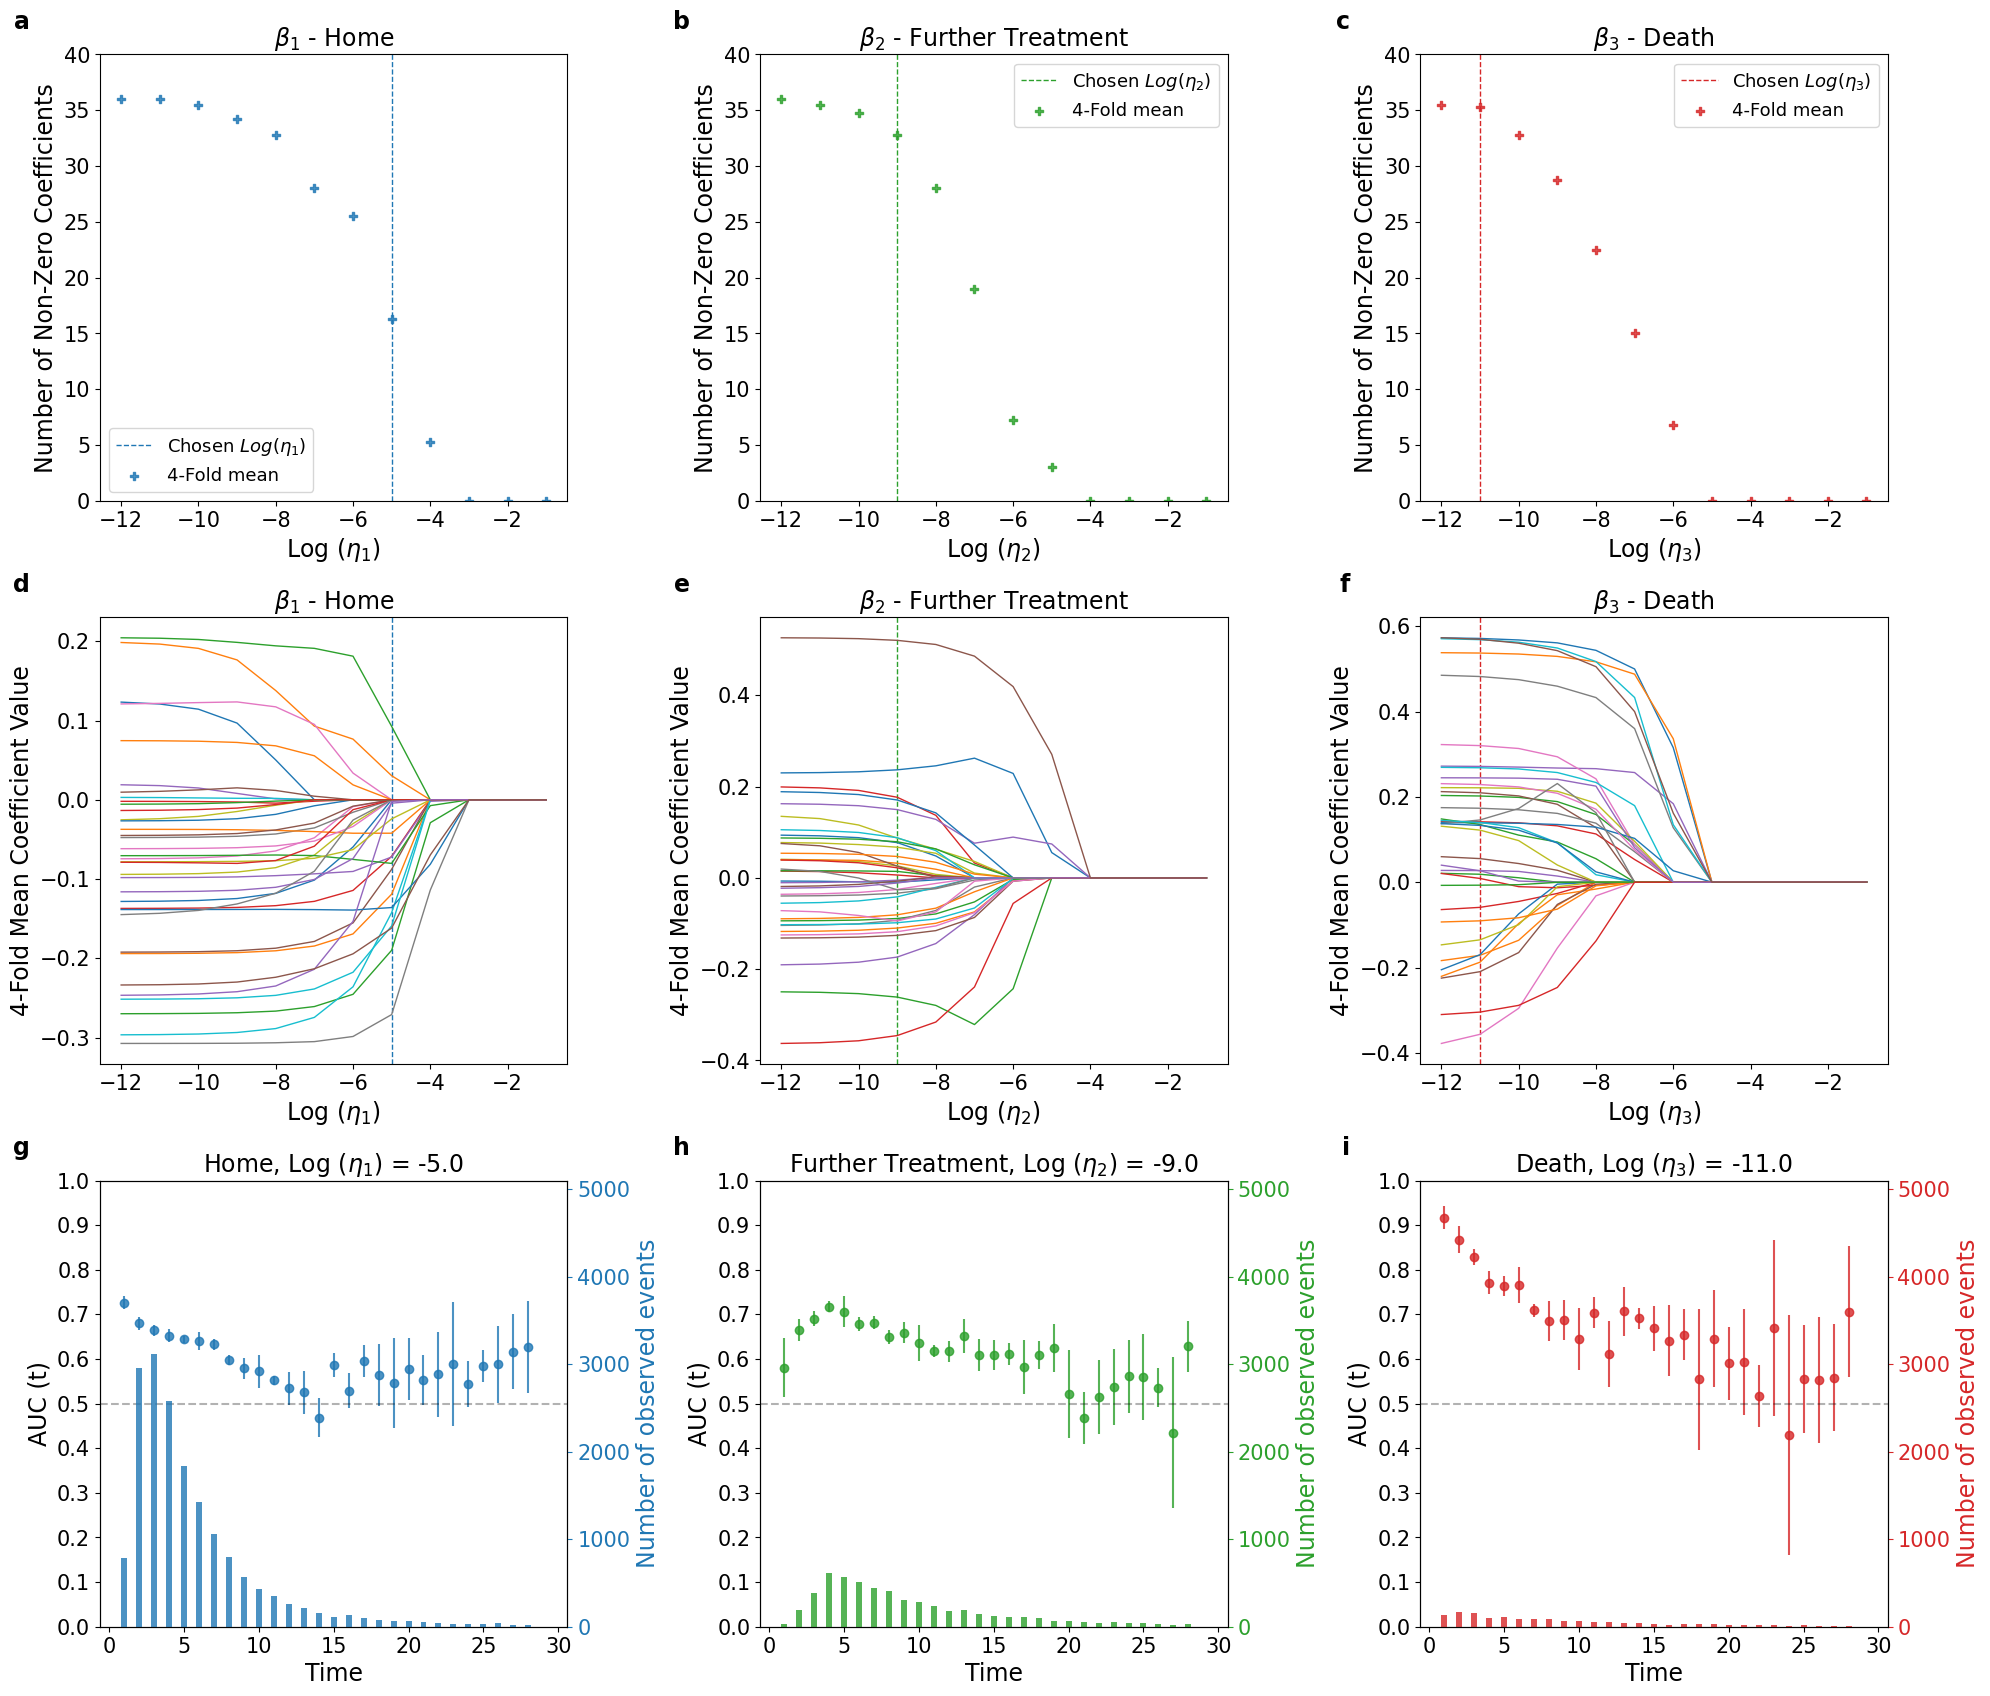

In [10]:
from pydts.examples_utils.plots import create_mimic_analysis_results

risk1, risk2, risk3 = create_mimic_analysis_results(mimic_df, n_splits, penalizers, penalty_cv_search, 
                                                    chosen_eta, lee_fitter, new_fitter, reg_fitter)

In [11]:
risk1

,,Lee et al.,Two-Step,Two-Step & LASSO
,,Estimate (SE),Estimate (SE),Estimate (SE)
Admissions number 2,2,0.000 (0.024),0.003 (0.022),-0.000 (0.000)
Admissions number 3+,3+,-0.032 (0.023),-0.027 (0.022),-0.000 (0.000)
Anion gap,Abnormal,-0.137 (0.032),-0.128 (0.030),-0.000 (0.000)
Bicarbonate,Abnormal,-0.208 (0.021),-0.194 (0.020),-0.119 (0.019)
Calcium total,Abnormal,-0.291 (0.020),-0.270 (0.019),-0.190 (0.018)
Chloride,Abnormal,-0.148 (0.024),-0.137 (0.023),-0.071 (0.021)
Creatinine,Abnormal,-0.103 (0.024),-0.098 (0.023),-0.072 (0.021)
Direct emergency,Yes,-0.011 (0.026),-0.014 (0.024),-0.000 (0.000)
Ethnicity black,Black,0.006 (0.046),0.009 (0.042),-0.000 (0.000)


In [12]:
risk2

,,Lee et al.,Two-Step,Two-Step & LASSO
,,Estimate (SE),Estimate (SE),Estimate (SE)
Admissions number 2,2,0.108 (0.041),0.107 (0.040),0.087 (0.038)
Admissions number 3+,3+,0.194 (0.037),0.190 (0.036),0.169 (0.034)
Anion gap,Abnormal,-0.006 (0.048),-0.006 (0.047),-0.000 (0.002)
Bicarbonate,Abnormal,-0.121 (0.033),-0.117 (0.032),-0.110 (0.032)
Calcium total,Abnormal,-0.098 (0.031),-0.094 (0.031),-0.088 (0.030)
Chloride,Abnormal,0.016 (0.036),0.015 (0.035),0.000 (0.002)
Creatinine,Abnormal,-0.199 (0.036),-0.191 (0.035),-0.173 (0.035)
Direct emergency,Yes,-0.373 (0.052),-0.363 (0.050),-0.345 (0.050)
Ethnicity black,Black,0.084 (0.090),0.079 (0.088),0.028 (0.086)


In [13]:
risk3

,,Lee et al.,Two-Step,Two-Step & LASSO
,,Estimate (SE),Estimate (SE),Estimate (SE)
Admissions number 2,2,0.147 (0.074),0.147 (0.073),0.140 (0.074)
Admissions number 3+,3+,0.142 (0.069),0.140 (0.068),0.134 (0.068)
Anion gap,Abnormal,0.582 (0.064),0.573 (0.064),0.571 (0.064)
Bicarbonate,Abnormal,0.543 (0.056),0.537 (0.056),0.535 (0.056)
Calcium total,Abnormal,0.204 (0.054),0.204 (0.054),0.203 (0.054)
Chloride,Abnormal,0.147 (0.059),0.143 (0.058),0.142 (0.058)
Creatinine,Abnormal,0.273 (0.067),0.271 (0.067),0.271 (0.067)
Direct emergency,Yes,-0.318 (0.096),-0.311 (0.095),-0.302 (0.095)
Ethnicity black,Black,-0.236 (0.140),-0.235 (0.139),-0.203 (0.140)


## References

[1] Meir, Tomer and Gorfine, Malka, "Discrete-time Competing-Risks Regression with or without Penalization", Biometrics, Volume 81, Issue 2, 2025.

[2] Meir, Tomer, Gutman, Rom, and Gorfine, Malka, "PyDTS: A Python Package for Discrete-Time Survival Analysis with Competing Risks with Optional Penalization", Journal of Open Source Software, 2025, doi: 10.21105/joss.08815 

[3] Lee, Minjung and Feuer, Eric J. and Fine, Jason P., "On the analysis of discrete time competing risks data", Biometrics, 2018.